In [7]:
pip install openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   --------- ----------------------------- 61.4/250.0 kB 656.4 kB/s eta 0:00:01
   -------------------------------- ------- 204.8/250.0 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import statistics
from os import listdir
import pycaret
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
def clustering(data, participants): 
    
    cost = []
    silhouette = []

    for i in range(2, participants):
        kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 0)
        kmeans.fit_predict(data)
        
        # Calculate Silhoutte Score
        score = silhouette_score(data, kmeans.labels_, metric='euclidean')
        silhouette.append(score)
    
        # Calculates squared error for the clustered points
        cost.append(kmeans.inertia_)    
        
    # Plot the cost against K values
    plt.plot(range(2, participants), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
    # Plot the Silhouette Score against K values
    plt.plot(range(2, participants), silhouette, color ='b', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Silhouette Score")
    plt.show() # clear the plot
    # the point of the elbow is the
    # most optimal value for choosing k

In [3]:
def silhouette(data, clusters):
    kmeans = KMeans(n_clusters = clusters, max_iter = 500, random_state = 0)
    kmeans.fit_predict(data)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')#ax[q-1][mod])#, ax = ax[x%3][y%2]
    
    #Fit the visualizer
    visualizer.fit(data)
    #fig, ax = plt.subplots(3,2, figsize = (10,10))

# SWELL

In [4]:
swell = pd.read_csv("Final_CSVs/swell_new.csv")

In [5]:
# swell_extra = pd.read_excel('Personality_Files/swell_person.xlsx')
swell_extra = pd.read_excel('scored_surveys/swell_person.xlsx')

In [6]:
swell

,HR,RMSSD,SCL,id,dataset,stress
0,58,0.093757,119.071484,PP4,Train,0
1,999,999.000000,138.735573,PP19,Train,0
2,999,999.000000,999.000000,PP22,Train,1
3,999,999.000000,120.251942,PP3,Train,1
4,70,0.064568,561.332213,PP21,Train,0
...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,Test,1
3136,999,999.000000,999.000000,PP22,Test,1
3137,999,999.000000,93.893556,PP4,Test,0
3138,999,999.000000,999.000000,PP23,Test,0


In [7]:
swell_extra

,PP,Age,Gender,Occupation,Dominant hand,Glasses,smoke,coffee,alcohol,physical,stress,heart disease,medicine,Internal control index
0,PP1,27,m,student,right,no,6,6,6,6,6,no,no,2.93
1,PP2,25,m,student,right,no,6,6,6,4,5,no,no,4.25
2,PP3,24,m,student,right,no,6,6,6,6,6,no,no,3.61
3,PP4,24,m,student,right,no,6,6,6,2,6,no,no,3.61
4,PP5,24,f,student,right,no,6,6,6,6,6,no,no,3.71
5,PP6,24,m,student,right,no,6,6,6,6,6,no,no,3.86
6,PP7,22,m,student,right,no,6,6,6,6,6,no,no,3.64
7,PP8,27,m,MSc Electrical Engineering,right,yes,6,6,6,3,6,no,no,3.57
8,PP9,28,m,PhD informatics,right,no,6,6,6,2,6,no,no,3.25
9,PP10,25,m,Information Science,right,no,6,6,6,6,6,no,no,3.39


In [8]:
# Drop unnecessary features

swell_extra.drop(['heart disease'], axis=1, inplace=True)
swell_extra.drop(['medicine'], axis=1, inplace=True)
swell_extra.drop(['Glasses'], axis=1, inplace=True)
swell_extra.drop(['smoke'], axis=1, inplace=True)
swell_extra.drop(['alcohol'], axis=1, inplace=True)

In [9]:
# Group all Master students in one category

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="MSc Electrical Engineering","MSc", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Master MKE", "MSc", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="MSc Technische Informatica", "MSc", swell_extra['Occupation'])

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Computer Engineering", "student", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Physics", "student", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Information Science", "student", swell_extra['Occupation'])


swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Icelandic", "other", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Photography", "other", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Technische bestuurskunde", "other", swell_extra['Occupation'])

# Group all PhD students in one category

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="PhD informatics", "PhD", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="student (Phd?)", "PhD", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="PhD candidate", "PhD", swell_extra['Occupation'])

In [10]:
# Label Encoding categorical features

le = preprocessing.LabelEncoder()

swell_extra['Occupation'] = le.fit_transform(swell_extra['Occupation'])
swell_extra['Dominant hand'] = le.fit_transform(swell_extra['Dominant hand'])
swell_extra['Gender'] = le.fit_transform(swell_extra['Gender'])

In [11]:
swell_extra

,PP,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index
0,PP1,27,1,3,1,6,6,6,2.93
1,PP2,25,1,3,1,6,4,5,4.25
2,PP3,24,1,3,1,6,6,6,3.61
3,PP4,24,1,3,1,6,2,6,3.61
4,PP5,24,0,3,1,6,6,6,3.71
5,PP6,24,1,3,1,6,6,6,3.86
6,PP7,22,1,3,1,6,6,6,3.64
7,PP8,27,1,0,1,6,3,6,3.57
8,PP9,28,1,1,1,6,2,6,3.25
9,PP10,25,1,3,1,6,6,6,3.39


In [12]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#swell_extra[['Age', 'Occupation', 'smoke', 'physical', 'stress', 'Internal control index']] = scaler.fit_transform(swell_extra[['Age', 'Occupation', 'smoke',  'physical', 'stress', 'Internal control index']])


In [13]:
scaler = StandardScaler()
swell_extra[["Age", "Gender", "Occupation", "Dominant hand", "coffee", "physical", "stress", "Internal control index"]] = scaler.fit_transform(swell_extra[["Age", "Gender", "Occupation", "Dominant hand", "coffee", "physical", "stress", "Internal control index"]])


In [14]:
swell_extra = swell_extra.rename(columns={"PP":"id"})
swell_extra

,id,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index
0,PP1,0.615457,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-2.531632
1,PP2,0.000000,0.685994,0.727171,0.294884,0.204124,-0.231695,-0.272103,1.986695
2,PP3,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.204009
3,PP4,-0.307729,0.685994,0.727171,0.294884,0.204124,-1.284851,0.483739,-0.204009
4,PP5,-0.307729,-1.457738,0.727171,0.294884,0.204124,0.821462,0.483739,0.138288
5,PP6,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,0.651734
6,PP7,-0.923186,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.101320
7,PP8,0.615457,0.685994,-1.869867,0.294884,0.204124,-0.758273,0.483739,-0.340928
8,PP9,0.923186,0.685994,-1.004188,0.294884,0.204124,-1.284851,0.483739,-1.436280
9,PP10,0.000000,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.957064


## Multi-Attribute-Splitting (All features)

In [15]:
swell_all_features = swell[['id', 'HR', 'RMSSD', 'SCL']]
swell_all_features

,id,HR,RMSSD,SCL
0,PP4,58,0.093757,119.071484
1,PP19,999,999.000000,138.735573
2,PP22,999,999.000000,999.000000
3,PP3,999,999.000000,120.251942
4,PP21,70,0.064568,561.332213
...,...,...,...,...
3135,PP24,999,999.000000,158.138912
3136,PP22,999,999.000000,999.000000
3137,PP4,999,999.000000,93.893556
3138,PP23,999,999.000000,999.000000


In [16]:
swell_mean = swell_all_features.groupby('id', as_index = False, group_keys = True).mean()
swell_mean = swell_mean.rename(columns={"HR": "HR_mean", "RMSSD": "RMSSD_mean", "SCL": "SCL_mean"})

swell_min = swell_all_features.groupby('id', as_index = False, group_keys = True).min()
swell_min = swell_min.rename(columns={"HR": "HR_min", "RMSSD": "RMSSD_min", "SCL": "SCL_min"})

swell_std = swell_all_features.groupby('id', as_index = False, group_keys = True).std()
swell_std = swell_std.rename(columns={"HR": "HR_std", "RMSSD": "RMSSD_std", "SCL": "SCL_std"})

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

swell_mean[['HR_mean', 'RMSSD_mean', 'SCL_mean']] = scaler.fit_transform(swell_mean[['HR_mean', 'RMSSD_mean', 'SCL_mean']])
swell_min[['HR_min', 'RMSSD_min', 'SCL_min']] = scaler.fit_transform(swell_min[['HR_min', 'RMSSD_min', 'SCL_min']])
swell_std[['HR_std', 'RMSSD_std', 'SCL_std']] = scaler.fit_transform(swell_std[['HR_std', 'RMSSD_std', 'SCL_std']])

In [18]:
swell_all_grouped = swell_extra.join(swell_mean.set_index('id'), on='id')
swell_all_grouped = swell_all_grouped.join(swell_min.set_index('id'), on='id')
swell_all_grouped = swell_all_grouped.join(swell_std.set_index('id'), on='id')
swell_all_grouped

,id,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index,HR_mean,RMSSD_mean,SCL_mean,HR_min,RMSSD_min,SCL_min,HR_std,RMSSD_std,SCL_std
0,PP1,0.615457,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-2.531632,-0.900394,-0.876707,-1.222782,-0.319298,-0.294909,-1.004249,0.465365,0.439151,-0.949413
1,PP2,0.000000,0.685994,0.727171,0.294884,0.204124,-0.231695,-0.272103,1.986695,-1.646229,-1.646932,-1.230384,-0.295646,-0.294888,-0.971799,-1.217241,-1.219896,-1.822954
2,PP3,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.204009,0.884367,0.867364,-0.548374,-0.264111,-0.294924,-0.312573,0.186334,0.249442,0.335381
3,PP4,-0.307729,0.685994,0.727171,0.294884,0.204124,-1.284851,0.483739,-0.204009,1.243265,1.247300,0.375704,-0.319298,-0.294784,-0.823730,-0.424820,-0.457861,1.405055
4,PP5,-0.307729,-1.457738,0.727171,0.294884,0.204124,0.821462,0.483739,0.138288,0.122998,0.126018,-0.862919,-0.307472,-0.294853,-0.768211,0.820475,0.816977,0.149815
5,PP6,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,0.651734,-0.575141,-0.550986,-1.113142,-0.323240,-0.294865,-0.861158,0.741422,0.707874,-1.239744
6,PP7,-0.923186,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.101320,-1.023418,-1.017587,-0.207807,-0.323240,-0.294906,0.021783,0.272457,0.269073,0.687546
7,PP8,0.615457,0.685994,-1.869867,0.294884,0.204124,-0.758273,0.483739,-0.340928,1.656421,1.654327,1.227664,3.390077,3.391165,1.674636,-2.793593,-2.803529,1.016631
8,PP9,0.923186,0.685994,-1.004188,0.294884,0.204124,-1.284851,0.483739,-1.436280,0.450904,0.458573,2.375174,-0.323240,-0.294842,3.584380,0.682556,0.662209,-0.046574
9,PP10,0.000000,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.957064,0.398311,0.406084,-0.785393,-0.315356,-0.294852,-0.630076,0.715259,0.695735,0.187333


In [19]:
# Keep user IDs in a separate datarame

ids = swell_all_grouped['id']
swell_all_grouped.drop(['id'], axis=1, inplace=True)

In [20]:
swell_all_grouped.drop(['RMSSD_min'], axis=1, inplace=True)
swell_all_grouped

,Age,Gender,Occupation,Dominant hand,coffee,physical,stress,Internal control index,HR_mean,RMSSD_mean,SCL_mean,HR_min,SCL_min,HR_std,RMSSD_std,SCL_std
0,0.615457,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-2.531632,-0.900394,-0.876707,-1.222782,-0.319298,-1.004249,0.465365,0.439151,-0.949413
1,0.000000,0.685994,0.727171,0.294884,0.204124,-0.231695,-0.272103,1.986695,-1.646229,-1.646932,-1.230384,-0.295646,-0.971799,-1.217241,-1.219896,-1.822954
2,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.204009,0.884367,0.867364,-0.548374,-0.264111,-0.312573,0.186334,0.249442,0.335381
3,-0.307729,0.685994,0.727171,0.294884,0.204124,-1.284851,0.483739,-0.204009,1.243265,1.247300,0.375704,-0.319298,-0.823730,-0.424820,-0.457861,1.405055
4,-0.307729,-1.457738,0.727171,0.294884,0.204124,0.821462,0.483739,0.138288,0.122998,0.126018,-0.862919,-0.307472,-0.768211,0.820475,0.816977,0.149815
5,-0.307729,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,0.651734,-0.575141,-0.550986,-1.113142,-0.323240,-0.861158,0.741422,0.707874,-1.239744
6,-0.923186,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.101320,-1.023418,-1.017587,-0.207807,-0.323240,0.021783,0.272457,0.269073,0.687546
7,0.615457,0.685994,-1.869867,0.294884,0.204124,-0.758273,0.483739,-0.340928,1.656421,1.654327,1.227664,3.390077,1.674636,-2.793593,-2.803529,1.016631
8,0.923186,0.685994,-1.004188,0.294884,0.204124,-1.284851,0.483739,-1.436280,0.450904,0.458573,2.375174,-0.323240,3.584380,0.682556,0.662209,-0.046574
9,0.000000,0.685994,0.727171,0.294884,0.204124,0.821462,0.483739,-0.957064,0.398311,0.406084,-0.785393,-0.315356,-0.630076,0.715259,0.695735,0.187333


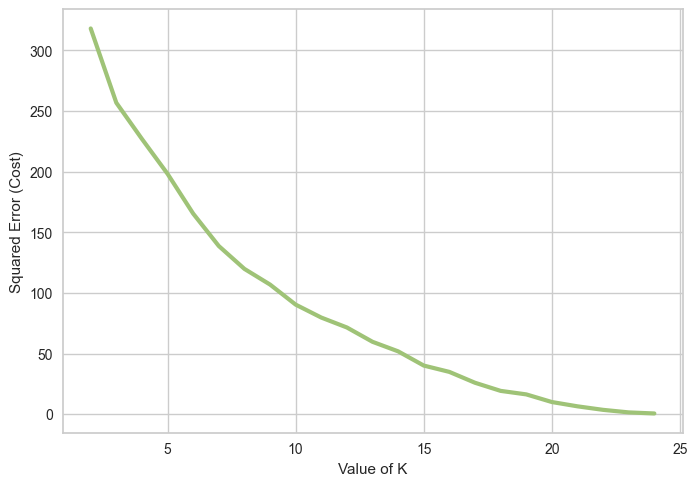

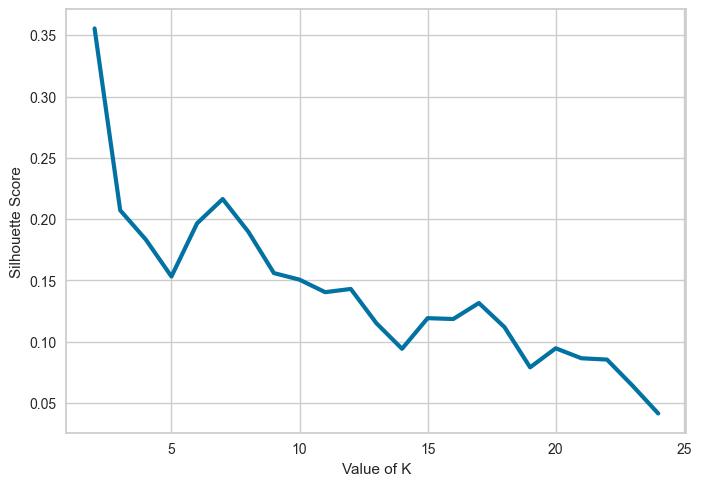

In [21]:
clustering(swell_all_grouped, 25)

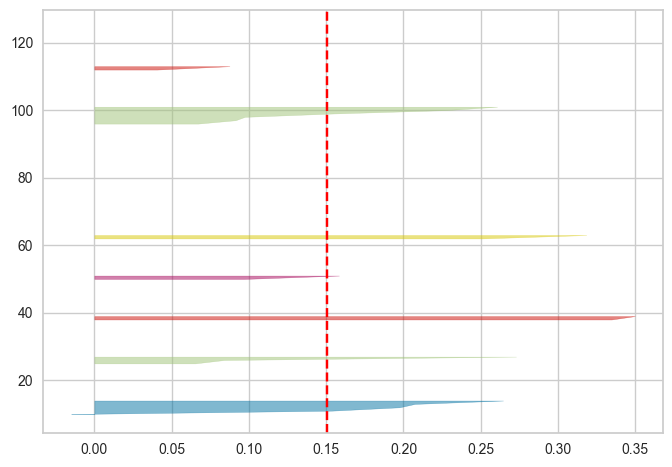

In [22]:
silhouette(swell_all_grouped, 10)

In [23]:
kmeans = KMeans(n_clusters = 11, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(swell_all_grouped)
y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
8          6
2          5
0          3
3          2
4          2
7          2
1          1
5          1
6          1
9          1
10         1
dtype: int64

####  Visualization with t-SNE

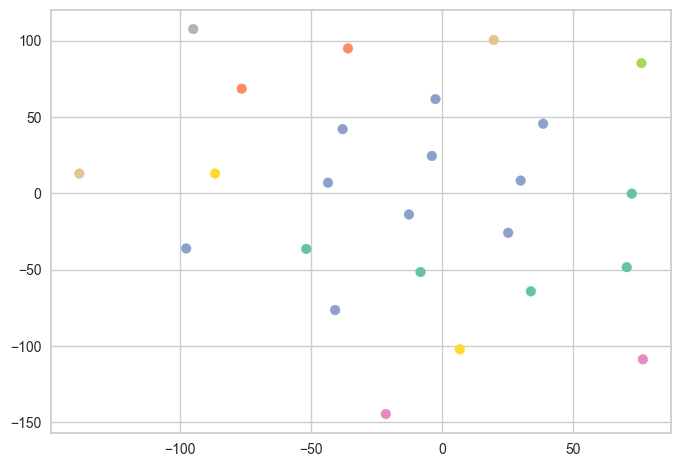

In [25]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
model = kmeans.fit(swell_all_grouped)

# Choose a perplexity value
perplexity_value = 20  # Adjust this value as needed

tsne = TSNE(perplexity=perplexity_value).fit_transform(swell_all_grouped)
plt.scatter(x = tsne[:, 0], y = tsne[:, 1], c=model.labels_, cmap='Set2')

In [26]:
clusters = pd.concat([ids, y], axis=1)
clusters

,id,Cluster
0,PP1,8
1,PP2,1
2,PP3,8
3,PP4,0
4,PP5,2
5,PP6,8
6,PP7,8
7,PP8,3
8,PP9,9
9,PP10,8


In [27]:
swell_grouped_all = swell.join(clusters.set_index('id'), on='id')
swell_grouped_all

,HR,RMSSD,SCL,id,dataset,stress,Cluster
0,58,0.093757,119.071484,PP4,Train,0,0
1,999,999.000000,138.735573,PP19,Train,0,2
2,999,999.000000,999.000000,PP22,Train,1,8
3,999,999.000000,120.251942,PP3,Train,1,8
4,70,0.064568,561.332213,PP21,Train,0,6
...,...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,Test,1,0
3136,999,999.000000,999.000000,PP22,Test,1,8
3137,999,999.000000,93.893556,PP4,Test,0,0
3138,999,999.000000,999.000000,PP23,Test,0,7


In [28]:
swell_grouped_all.to_csv("Final_CSVs/swell_clusters_all11.csv", index = False)

In [4]:
swell_grouped_all = pd.read_csv('Final_CSVs/swell_clusters_all11.csv')

In [5]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

swell_grouped_all = swell_grouped_all.drop('dataset', axis = 1)
swell_grouped_all

,HR,RMSSD,SCL,id,stress,Cluster
0,58,0.093757,119.071484,PP4,0,0
1,999,999.000000,138.735573,PP19,0,2
2,999,999.000000,999.000000,PP22,1,8
3,999,999.000000,120.251942,PP3,1,8
4,70,0.064568,561.332213,PP21,0,6
...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,1,0
3136,999,999.000000,999.000000,PP22,1,8
3137,999,999.000000,93.893556,PP4,0,0
3138,999,999.000000,999.000000,PP23,0,7


In [6]:
unique_participants = swell_grouped_all["Cluster"].unique()
all_group = swell_grouped_all.groupby('Cluster')

In [7]:
print(unique_participants)

[ 0  2  8  6  7  3  1 10  9  4  5]


In [8]:
for participant in unique_participants:
    print("Participant: ",participant)    
    part_df = all_group.get_group(participant)

    unique_ids = part_df['id'].unique()
    print("Unique IDs:", unique_ids)

Participant:  0
Unique IDs: ['PP4' 'PP24' 'PP25']
Participant:  2
Unique IDs: ['PP19' 'PP12' 'PP5' 'PP20' 'PP13']
Participant:  8
Unique IDs: ['PP22' 'PP3' 'PP1' 'PP10' 'PP6' 'PP7']
Participant:  6
Unique IDs: ['PP21']
Participant:  7
Unique IDs: ['PP23' 'PP15']
Participant:  3
Unique IDs: ['PP8' 'PP11']
Participant:  1
Unique IDs: ['PP2']
Participant:  10
Unique IDs: ['PP16']
Participant:  9
Unique IDs: ['PP9']
Participant:  4
Unique IDs: ['PP14' 'PP18']
Participant:  5
Unique IDs: ['PP17']


In [9]:
for participant in unique_participants:
  print("Group: ", participant)
  part_df = all_group.get_group(participant)

  # Count the number of rows for each ID using value_counts()
  id_counts = part_df['id'].value_counts()

  # Print the ID and its corresponding count
  print("ID Counts:")
  for id, count in id_counts.items():
    print(f"  ID: {id}, Count: {count}")

Group:  0
ID Counts:
  ID: PP24, Count: 130
  ID: PP4, Count: 128
  ID: PP25, Count: 128
Group:  2
ID Counts:
  ID: PP19, Count: 130
  ID: PP12, Count: 129
  ID: PP20, Count: 129
  ID: PP13, Count: 126
  ID: PP5, Count: 125
Group:  8
ID Counts:
  ID: PP7, Count: 130
  ID: PP1, Count: 129
  ID: PP3, Count: 128
  ID: PP10, Count: 128
  ID: PP22, Count: 126
  ID: PP6, Count: 126
Group:  6
ID Counts:
  ID: PP21, Count: 106
Group:  7
ID Counts:
  ID: PP23, Count: 129
  ID: PP15, Count: 121
Group:  3
ID Counts:
  ID: PP11, Count: 127
  ID: PP8, Count: 116
Group:  1
ID Counts:
  ID: PP2, Count: 121
Group:  10
ID Counts:
  ID: PP16, Count: 129
Group:  9
ID Counts:
  ID: PP9, Count: 122
Group:  4
ID Counts:
  ID: PP14, Count: 129
  ID: PP18, Count: 119
Group:  5
ID Counts:
  ID: PP17, Count: 129


In [10]:
def train_test_split_per_user(data, train_size=0.7):
    users = list(set(data.id))
    users = sorted(users, reverse=True)  # fix randomness
    total_users = len(users)
    slice = int(train_size * total_users)
    users_train = users[:slice]
    users_test = users[slice:]
    return data[data.id.isin(users_train)], data[data.id.isin(users_test)]

In [16]:
from sklearn.model_selection import train_test_split
import os  # Import os module for folder creation

# Specify folder name
folder_name = "SWELL_Multi_Attribute_Splitting_Output_Files"

# Load the CSV data into a pandas dataframe
df_user_info = pd.read_csv("Scored_Surveys/swell_person.csv", sep=";")

accuracies_swell = []
precision_swell = []
recall_swell = []
f1scores_swell = []

for participant in unique_participants:
    print("Group: ",participant)    
    part_df = all_group.get_group(participant)

    # -----------------------------------------------------

    # if the group has only one id don't split per user
    if participant in [1,5,6,9,10]:
        train_data, test_data = train_test_split(part_df)
    else:
        train_data, test_data = train_test_split_per_user(part_df)
    
    fold_groups = train_data.id

    # Save the 'id' column from the test set
    test_ids = test_data['id']

    train_data = train_data.drop(columns=['id'])
    test_data = test_data.drop(columns=['id'])

    # -----------------------------------------------------

    grid = setup(data=train_data, target='stress', fix_imbalance = True, html=False, verbose=False, test_data=test_data) #fix_imbalance = True,
    best = compare_models(sort='F1')
    accuracies_swell.append(pull()['Accuracy'][0])
    precision_swell.append(pull()['Prec.'][0])
    recall_swell.append(pull()['Recall'][0])
    f1scores_swell.append(pull()['F1'][0])
    print(best)

    # ---------------------------------------------------

    # Make predictions using the best model
    predictions = predict_model(best, data=test_data)

    # Add 'id' column back to predictions DataFrame
    predictions['PP'] = test_ids  # Use the 'id' column from the test data

    # Merge the dataframes based on the 'PP' column
    predictions_with_info = predictions.merge(df_user_info, on="PP", how="left")

    # Extract true labels (y_true), rename the column
    y_true = predictions_with_info[['stress_x']].rename(columns={'stress_x': 'y_true'})

    # Extract predicted labels (y_pred), rename the column
    y_pred = predictions_with_info[['prediction_label']].rename(columns={'prediction_label': 'y_pred'})

    # Identify protected attribute columns (assuming you know the column names)
    protected_attributes = predictions_with_info[['Age', 'Gender', 'Occupation']]

    # Concatenate DataFrames containing predictions and protected attributes
    all_data = pd.concat([test_ids.reset_index(drop=True), y_true, y_pred, protected_attributes], axis=1)

    # Create filename
    filename = f"predictions_{participant}.csv"

    # Create folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)  # Create folder using makedirs()

    # Create full path with folder name
    filepath = os.path.join(folder_name, filename)

    # Save predictions
    all_data.to_csv(filepath, index=False)

    print(f"Predictions saved to: {filepath}")

Group:  0


                                    Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.8705  0.8761  0.9192  0.8615   
ada                  Ada Boost Classifier    0.8588  0.8889  0.9192  0.8432   
lightgbm  Light Gradient Boosting Machine    0.8394  0.9054  0.8835  0.8397   
rf               Random Forest Classifier    0.8315  0.8690  0.8538  0.8463   
et                 Extra Trees Classifier    0.8318  0.8439  0.8473  0.8499   
gbc          Gradient Boosting Classifier    0.8278  0.8822  0.8467  0.8445   
dt               Decision Tree Classifier    0.8118  0.7764  0.8242  0.8361   
nb                            Naive Bayes    0.6243  0.9018  0.9709  0.5938   
lr                    Logistic Regression    0.7348  0.9066  0.5764  0.8925   
ridge                    Ridge Classifier    0.7348  0.0000  0.5764  0.8925   
lda          Linear Discriminant Analysis    0.7348  0.9090  0.5764  0.8925   
svm                   SVM - Linear Kernel    0.7108 

                                    Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.7392  0.7585  0.8388  0.7209   
et                 Extra Trees Classifier    0.7420  0.8024  0.8198  0.7306   
rf               Random Forest Classifier    0.7395  0.8063  0.8243  0.7239   
knn                K Neighbors Classifier    0.7396  0.8089  0.8157  0.7317   
lightgbm  Light Gradient Boosting Machine    0.7373  0.8162  0.8193  0.7259   
gbc          Gradient Boosting Classifier    0.7290  0.7973  0.7805  0.7310   
ada                  Ada Boost Classifier    0.7033  0.7777  0.7138  0.7323   
lr                    Logistic Regression    0.5705  0.5554  0.5855  0.5986   
nb                            Naive Bayes    0.5652  0.5439  0.5560  0.6029   
ridge                    Ridge Classifier    0.5574  0.0000  0.5564  0.5899   
lda          Linear Discriminant Analysis    0.5600  0.5434  0.5517  0.5940   
svm                   SVM - Linear Kernel    0.5180 

                                    Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.6882  0.7348  0.7390  0.6951   
lightgbm  Light Gradient Boosting Machine    0.6725  0.7360  0.7242  0.6830   
gbc          Gradient Boosting Classifier    0.6647  0.7284  0.7097  0.6785   
rf               Random Forest Classifier    0.6647  0.7051  0.7130  0.6711   
dt               Decision Tree Classifier    0.6569  0.6646  0.7168  0.6642   
ada                  Ada Boost Classifier    0.6451  0.6748  0.7249  0.6526   
et                 Extra Trees Classifier    0.6471  0.6594  0.7054  0.6535   
nb                            Naive Bayes    0.5431  0.5567  0.6144  0.5521   
svm                   SVM - Linear Kernel    0.5176  0.0000  0.6630  0.4317   
ridge                    Ridge Classifier    0.5216  0.0000  0.4504  0.5683   
lda          Linear Discriminant Analysis    0.5118  0.5054  0.4282  0.5591   
lr                    Logistic Regression    0.5039 

                                    Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.6357  0.6685  0.6417  0.6255   
rf               Random Forest Classifier    0.6321  0.6792  0.6000  0.5671   
ada                  Ada Boost Classifier    0.5696  0.6342  0.5333  0.5183   
dt               Decision Tree Classifier    0.5536  0.5525  0.5500  0.5002   
et                 Extra Trees Classifier    0.5839  0.6808  0.5000  0.5571   
lightgbm  Light Gradient Boosting Machine    0.5607  0.6083  0.5250  0.5467   
svm                   SVM - Linear Kernel    0.5839  0.0000  0.5500  0.6446   
gbc          Gradient Boosting Classifier    0.5429  0.6133  0.4750  0.4988   
lda          Linear Discriminant Analysis    0.6339  0.6446  0.4167  0.6300   
lr                    Logistic Regression    0.6464  0.6133  0.3917  0.6633   
ridge                    Ridge Classifier    0.5839  0.0000  0.3667  0.5467   
nb                            Naive Bayes    0.6339 

                                    Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.5808  0.7601  1.0000  0.5632   
ridge                    Ridge Classifier    0.7449  0.0000  0.6405  0.8744   
lda          Linear Discriminant Analysis    0.7449  0.7891  0.6405  0.8744   
lr                    Logistic Regression    0.7372  0.8081  0.6405  0.8544   
knn                K Neighbors Classifier    0.7372  0.7512  0.6262  0.8628   
lightgbm  Light Gradient Boosting Machine    0.7449  0.7653  0.5976  0.9161   
rf               Random Forest Classifier    0.7064  0.7653  0.5690  0.8600   
svm                   SVM - Linear Kernel    0.6269  0.0000  0.6571  0.7510   
et                 Extra Trees Classifier    0.6910  0.7569  0.5548  0.8314   
gbc          Gradient Boosting Classifier    0.6833  0.7165  0.5405  0.8164   
ada                  Ada Boost Classifier    0.6833  0.7093  0.5405  0.8000   
dt               Decision Tree Classifier    0.6756 

                                    Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.5826  0.5950  0.5733  0.6171   
nb                            Naive Bayes    0.5826  0.5950  0.5733  0.6171   
ridge                    Ridge Classifier    0.5826  0.0000  0.5733  0.6171   
lda          Linear Discriminant Analysis    0.5826  0.5950  0.5733  0.6171   
lightgbm  Light Gradient Boosting Machine    0.5311  0.5256  0.4567  0.5900   
knn                K Neighbors Classifier    0.5212  0.5231  0.3700  0.6236   
svm                   SVM - Linear Kernel    0.5250  0.0000  0.5833  0.3260   
et                 Extra Trees Classifier    0.5402  0.4647  0.3233  0.6733   
rf               Random Forest Classifier    0.5152  0.4583  0.3233  0.5967   
dt               Decision Tree Classifier    0.5068  0.4458  0.3233  0.5900   
gbc          Gradient Boosting Classifier    0.5068  0.4464  0.3233  0.5900   
ada                  Ada Boost Classifier    0.5068 

                                    Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9444  0.9850   0.955  0.9383   
rf               Random Forest Classifier    0.9333  0.9900   0.955  0.9264   
ada                  Ada Boost Classifier    0.9333  0.9700   0.930  0.9333   
lda          Linear Discriminant Analysis    0.9222  0.9200   0.975  0.8898   
et                 Extra Trees Classifier    0.9222  0.9650   0.930  0.9264   
lr                    Logistic Regression    0.9222  0.9350   0.930  0.9183   
ridge                    Ridge Classifier    0.9111  0.0000   0.975  0.8731   
gbc          Gradient Boosting Classifier    0.9000  0.9525   0.930  0.8814   
knn                K Neighbors Classifier    0.8889  0.9475   0.950  0.8598   
dt               Decision Tree Classifier    0.8889  0.8900   0.910  0.8683   
nb                            Naive Bayes    0.7778  0.9300   0.950  0.7201   
svm                   SVM - Linear Kernel    0.7222 

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9289  0.9825  0.9467  0.9405   
rf               Random Forest Classifier    0.9289  0.9842  0.9467  0.9429   
lr                    Logistic Regression    0.9289  0.9958  0.9300  0.9571   
knn                K Neighbors Classifier    0.9278  0.9379  0.9267  0.9548   
lightgbm  Light Gradient Boosting Machine    0.9167  0.9683  0.9067  0.9571   
dt               Decision Tree Classifier    0.8978  0.8925  0.9100  0.9298   
gbc          Gradient Boosting Classifier    0.8967  0.9625  0.9067  0.9321   
ada                  Ada Boost Classifier    0.8767  0.9617  0.9100  0.9014   
lda          Linear Discriminant Analysis    0.8778  0.9242  0.9300  0.8755   
ridge                    Ridge Classifier    0.8667  0.0000  0.9100  0.8755   
nb                            Naive Bayes    0.6856  0.9367  1.0000  0.6567   
svm                   SVM - Linear Kernel    0.8322 

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.7133  0.7130   0.760  0.7174   
lightgbm  Light Gradient Boosting Machine    0.7022  0.7255   0.750  0.7326   
ridge                    Ridge Classifier    0.7356  0.0000   0.710  0.7533   
gbc          Gradient Boosting Classifier    0.7122  0.7915   0.740  0.7279   
lda          Linear Discriminant Analysis    0.7256  0.7520   0.690  0.7483   
dt               Decision Tree Classifier    0.6900  0.6700   0.740  0.6989   
rf               Random Forest Classifier    0.7022  0.7135   0.715  0.7145   
lr                    Logistic Regression    0.7033  0.7560   0.690  0.7167   
ada                  Ada Boost Classifier    0.6689  0.7105   0.740  0.6710   
knn                K Neighbors Classifier    0.6044  0.7140   0.670  0.6183   
nb                            Naive Bayes    0.5289  0.6350   0.610  0.5488   
svm                   SVM - Linear Kernel    0.5056 

                                    Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.7068  0.0000  0.7119  0.7681   
lda          Linear Discriminant Analysis    0.6985  0.7638  0.6810  0.7863   
et                 Extra Trees Classifier    0.6795  0.6867  0.7381  0.7232   
nb                            Naive Bayes    0.6212  0.6157  0.8286  0.6429   
lr                    Logistic Regression    0.6818  0.7610  0.6690  0.7563   
rf               Random Forest Classifier    0.6553  0.7457  0.7119  0.7044   
gbc          Gradient Boosting Classifier    0.6295  0.6995  0.6810  0.6971   
dt               Decision Tree Classifier    0.6220  0.6145  0.6690  0.6824   
lightgbm  Light Gradient Boosting Machine    0.6220  0.7195  0.6381  0.7060   
svm                   SVM - Linear Kernel    0.5788  0.0000  0.8000  0.5409   
ada                  Ada Boost Classifier    0.5977  0.6460  0.6238  0.6643   
knn                K Neighbors Classifier    0.5879 

                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9044  0.9395   0.960  0.8800   
gbc          Gradient Boosting Classifier    0.8933  0.9350   0.940  0.8767   
et                 Extra Trees Classifier    0.8844  0.9540   0.940  0.8719   
ada                  Ada Boost Classifier    0.8944  0.9655   0.895  0.9148   
dt               Decision Tree Classifier    0.8800  0.8800   0.895  0.8717   
lightgbm  Light Gradient Boosting Machine    0.8733  0.9340   0.895  0.8717   
ridge                    Ridge Classifier    0.8422  0.0000   0.910  0.8129   
lda          Linear Discriminant Analysis    0.8422  0.8310   0.910  0.8129   
knn                K Neighbors Classifier    0.8311  0.8830   0.920  0.7931   
lr                    Logistic Regression    0.8411  0.9080   0.840  0.8648   
nb                            Naive Bayes    0.6756  0.9320   1.000  0.6137   
svm                   SVM - Linear Kernel    0.8011 

In [17]:
mean_acc = statistics.mean(accuracies_swell)
mean_prec = statistics.mean(precision_swell)
mean_rec = statistics.mean(recall_swell)
mean_f1 = statistics.mean(f1scores_swell)

In [18]:
print("Mean Accuracy SWELL- Cluster All Features: ",mean_acc)
print("Mean Precision SWELL- Cluster All Features: ",mean_f1)
print("Mean Recall SWELL- Cluster All Features: ",mean_rec)
print("Mean F1-score SWELL- Cluster All Features: ",mean_prec)

Mean Accuracy SWELL- Cluster All Features:  0.7540727272727272
Mean Precision SWELL- Cluster All Features:  0.7777272727272727
Mean Recall SWELL- Cluster All Features:  0.8223272727272727
Mean F1-score SWELL- Cluster All Features:  0.7570545454545454


In [19]:
folder_path = "SWELL_Multi_Attribute_Splitting_Output_Files"

# List all CSV files in the folder:
csv_files = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        csv_files.append(os.path.join(folder_path, filename))

# Concatenate files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [20]:
output_folder = "Output_Files"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)  # Create folder using makedirs()

# Create the full path with the output folder name
output_filepath = os.path.join(output_folder, "SWELL_Multi_Attribute_Splitting.csv")

# Save the concatenated DataFrame to the new CSV file
combined_df.to_csv(output_filepath, index=False)

print(f"All predictions saved to: {output_filepath}")

All predictions saved to: Output_Files\SWELL_Multi_Attribute_Splitting.csv


### Multi Attribute Splitting model trained with protected attributes

In [21]:
swell_grouped_all = pd.read_csv('Final_CSVs/swell_clusters_all11.csv')

In [22]:
# Load the CSV data into a pandas dataframe
df_user_info = pd.read_csv("Scored_Surveys/swell_person.csv", sep=";")
df_user_info.drop(columns=['stress'], inplace=True)
df_user_info.columns

Index(['PP', 'Age', 'Gender', 'Occupation', 'Dominant hand', 'Glasses',
       'smoke', 'coffee', 'alcohol', 'physical', 'heart disease', 'medicine',
       'Internal control index'],
      dtype='object')

In [23]:
# Load the CSV data into a pandas dataframe
df_user_info = pd.read_csv("Scored_Surveys/swell_person.csv", sep=";")

# Rename the 'PP' column to 'id'
df_user_info.rename(columns={'PP': 'id'}, inplace=True)

# Merge the dataframes based on the 'PP' column
swell_grouped_all = swell_grouped_all.merge(df_user_info, on="id", how="left")

# Print the result
print(swell_grouped_all.columns)

Index(['HR', 'RMSSD', 'SCL', 'id', 'dataset', 'stress_x', 'Cluster', 'Age',
       'Gender', 'Occupation', 'Dominant hand', 'Glasses', 'smoke', 'coffee',
       'alcohol', 'physical', 'stress_y', 'heart disease', 'medicine',
       'Internal control index'],
      dtype='object')


In [24]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

swell_grouped_all = swell_grouped_all.drop('dataset', axis = 1)
swell_grouped_all

,HR,RMSSD,SCL,id,stress_x,Cluster,Age,Gender,Occupation,Dominant hand,Glasses,smoke,coffee,alcohol,physical,stress_y,heart disease,medicine,Internal control index
0,58,0.093757,119.071484,PP4,0,0,24,m,student,right,no,6,6,6,2,6,no,no,"3,61"
1,999,999.000000,138.735573,PP19,0,2,23,f,Icelandic,right,yes,6,6,6,6,6,no,no,"3,61"
2,999,999.000000,999.000000,PP22,1,8,26,m,Physics,right,no,6,6,6,6,6,no,no,"3,61"
3,999,999.000000,120.251942,PP3,1,8,24,m,student,right,no,6,6,6,6,6,no,no,"3,61"
4,70,0.064568,561.332213,PP21,0,6,22,f,Photography,right,yes,4,5,5,5,4,no,no,"3,39"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,1,0,22,m,MSc Electrical Engineering,right,no,6,6,6,2,2,no,no,"3,82"
3136,999,999.000000,999.000000,PP22,1,8,26,m,Physics,right,no,6,6,6,6,6,no,no,"3,61"
3137,999,999.000000,93.893556,PP4,0,0,24,m,student,right,no,6,6,6,2,6,no,no,"3,61"
3138,999,999.000000,999.000000,PP23,0,7,25,f,Computer Engineering,right,no,6,6,6,2,4,no,no,"3,89"


In [25]:
unique_participants = swell_grouped_all["Cluster"].unique()
all_group = swell_grouped_all.groupby('Cluster')

In [26]:
for participant in unique_participants:
  print("Group: ", participant)
  part_df = all_group.get_group(participant)

  # Count the number of rows for each ID using value_counts()
  id_counts = part_df['id'].value_counts()

  # Print the ID and its corresponding count
  print("ID Counts:")
  for id, count in id_counts.items():
    print(f"  ID: {id}, Count: {count}")

Group:  0
ID Counts:
  ID: PP24, Count: 130
  ID: PP4, Count: 128
  ID: PP25, Count: 128
Group:  2
ID Counts:
  ID: PP19, Count: 130
  ID: PP12, Count: 129
  ID: PP20, Count: 129
  ID: PP13, Count: 126
  ID: PP5, Count: 125
Group:  8
ID Counts:
  ID: PP7, Count: 130
  ID: PP1, Count: 129
  ID: PP3, Count: 128
  ID: PP10, Count: 128
  ID: PP22, Count: 126
  ID: PP6, Count: 126
Group:  6
ID Counts:
  ID: PP21, Count: 106
Group:  7
ID Counts:
  ID: PP23, Count: 129
  ID: PP15, Count: 121
Group:  3
ID Counts:
  ID: PP11, Count: 127
  ID: PP8, Count: 116
Group:  1
ID Counts:
  ID: PP2, Count: 121
Group:  10
ID Counts:
  ID: PP16, Count: 129
Group:  9
ID Counts:
  ID: PP9, Count: 122
Group:  4
ID Counts:
  ID: PP14, Count: 129
  ID: PP18, Count: 119
Group:  5
ID Counts:
  ID: PP17, Count: 129


In [27]:
from sklearn.model_selection import train_test_split
import os  # Import os module for folder creation

# Specify folder name
folder_name = "SWELL_Multi_Attribute_Splitting_Output_Files_Bias"

# Load the CSV data into a pandas dataframe
df_user_info = pd.read_csv("Scored_Surveys/swell_person.csv", sep=";")

accuracies_swell = []
precision_swell = []
recall_swell = []
f1scores_swell = []

for participant in unique_participants:
    print("Group: ",participant)    
    part_df = all_group.get_group(participant)

    # -----------------------------------------------------

    # if the group has only one id don't split per user
    if participant in [1,5,6,9,10]:
        train_data, test_data = train_test_split(part_df)
    else:
        train_data, test_data = train_test_split_per_user(part_df)

    # train_data, test_data = train_test_split(part_df)

    fold_groups = train_data.id

    # Save the 'id' column from the test set
    test_ids = test_data['id']

    train_data = train_data.drop(columns=['id'])
    test_data = test_data.drop(columns=['id'])

    # -----------------------------------------------------

    grid = setup(data=train_data, target='stress_x', fix_imbalance = True, html=False, verbose=False, test_data=test_data) #fix_imbalance = True,
    best = compare_models(sort='F1')
    accuracies_swell.append(pull()['Accuracy'][0])
    precision_swell.append(pull()['Prec.'][0])
    recall_swell.append(pull()['Recall'][0])
    f1scores_swell.append(pull()['F1'][0])
    print(best)

    # ---------------------------------------------------

    # Make predictions using the best model
    predictions = predict_model(best, data=test_data)

    # Add 'id' column back to predictions DataFrame
    predictions['PP'] = test_ids  # Use the 'id' column from the test data

    # Extract true labels (y_true), rename the column
    y_true = predictions[['stress_x']].rename(columns={'stress_x': 'y_true'})

    # Extract predicted labels (y_pred), rename the column
    y_pred = predictions[['prediction_label']].rename(columns={'prediction_label': 'y_pred'})

    # Identify protected attribute columns (assuming you know the column names)
    protected_attributes = predictions[['Age', 'Gender', 'Occupation']]

    # Concatenate DataFrames containing predictions and protected attributes
    all_data = pd.concat([test_ids, y_true, y_pred, protected_attributes], axis=1)

    # Create filename
    filename = f"predictions_{participant}.csv"

    # Create folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)  # Create folder using makedirs()

    # Create full path with folder name
    filepath = os.path.join(folder_name, filename)

    # Save predictions
    all_data.to_csv(filepath, index=False)

    print(f"Predictions saved to: {filepath}")

Group:  0


                                    Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.8745  0.8836  0.9192  0.8672   
ada                  Ada Boost Classifier    0.8663  0.9019  0.9335  0.8440   
lightgbm  Light Gradient Boosting Machine    0.8511  0.9185  0.8901  0.8518   
gbc          Gradient Boosting Classifier    0.8472  0.9006  0.8753  0.8523   
rf               Random Forest Classifier    0.8434  0.8996  0.8610  0.8589   
et                 Extra Trees Classifier    0.8435  0.8699  0.8544  0.8650   
dt               Decision Tree Classifier    0.8392  0.8073  0.8527  0.8573   
nb                            Naive Bayes    0.6243  0.8564  0.9709  0.5938   
lr                    Logistic Regression    0.7348  0.8615  0.5764  0.8925   
ridge                    Ridge Classifier    0.7348  0.0000  0.5764  0.8925   
lda          Linear Discriminant Analysis    0.7348  0.8645  0.5764  0.8925   
svm                   SVM - Linear Kernel    0.6906 

                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.7707  0.8533  0.8140  0.7728   
knn                K Neighbors Classifier    0.7601  0.8273  0.8293  0.7514   
lightgbm  Light Gradient Boosting Machine    0.7605  0.8540  0.8052  0.7657   
et                 Extra Trees Classifier    0.7576  0.8423  0.7850  0.7728   
gbc          Gradient Boosting Classifier    0.7371  0.8377  0.7614  0.7562   
dt               Decision Tree Classifier    0.7345  0.7686  0.7619  0.7500   
ada                  Ada Boost Classifier    0.7004  0.7920  0.6393  0.7677   
svm                   SVM - Linear Kernel    0.5235  0.0000  0.8324  0.5421   
lr                    Logistic Regression    0.5522  0.5064  0.5417  0.5860   
lda          Linear Discriminant Analysis    0.5520  0.5164  0.5364  0.5869   
ridge                    Ridge Classifier    0.5520  0.0000  0.5269  0.5878   
nb                            Naive Bayes    0.5420 

                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.7686  0.8584  0.7577  0.8046   
lightgbm  Light Gradient Boosting Machine    0.7627  0.8613  0.7505  0.7951   
rf               Random Forest Classifier    0.7549  0.8416  0.7537  0.7815   
et                 Extra Trees Classifier    0.7529  0.8009  0.7426  0.7864   
knn                K Neighbors Classifier    0.7294  0.8125  0.7427  0.7517   
dt               Decision Tree Classifier    0.7196  0.7202  0.7283  0.7436   
svm                   SVM - Linear Kernel    0.5471  0.0000  0.9714  0.5457   
ada                  Ada Boost Classifier    0.6588  0.7434  0.6950  0.6758   
nb                            Naive Bayes    0.4882  0.4874  0.5230  0.5079   
qda       Quadratic Discriminant Analysis    0.5196  0.5130  0.5845  0.4401   
ridge                    Ridge Classifier    0.4882  0.0000  0.4419  0.5233   
lr                    Logistic Regression    0.4784 

                                    Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.6214  0.6125  0.6250  0.5917   
et                 Extra Trees Classifier    0.6089  0.6712  0.5583  0.5671   
svm                   SVM - Linear Kernel    0.5179  0.0000  0.7583  0.5179   
ada                  Ada Boost Classifier    0.5554  0.6696  0.5583  0.5029   
rf               Random Forest Classifier    0.6000  0.6035  0.5250  0.5000   
gbc          Gradient Boosting Classifier    0.5446  0.6200  0.4750  0.4817   
lightgbm  Light Gradient Boosting Machine    0.5607  0.5490  0.4500  0.5150   
knn                K Neighbors Classifier    0.5286  0.5162  0.4333  0.4583   
ridge                    Ridge Classifier    0.5839  0.0000  0.3750  0.6100   
lda          Linear Discriminant Analysis    0.5714  0.5538  0.3500  0.5100   
lr                    Logistic Regression    0.5464  0.6067  0.3500  0.4267   
nb                            Naive Bayes    0.6339 

                                    Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.5808  0.7601  1.0000  0.5632   
ridge                    Ridge Classifier    0.7372  0.0000  0.6262  0.8678   
lda          Linear Discriminant Analysis    0.7372  0.7772  0.6262  0.8678   
knn                K Neighbors Classifier    0.7295  0.7494  0.6262  0.8494   
lr                    Logistic Regression    0.7295  0.7891  0.6119  0.8628   
lightgbm  Light Gradient Boosting Machine    0.7372  0.7748  0.5833  0.9161   
rf               Random Forest Classifier    0.6987  0.7641  0.5690  0.8350   
et                 Extra Trees Classifier    0.6910  0.7248  0.5548  0.8314   
gbc          Gradient Boosting Classifier    0.6833  0.7284  0.5262  0.8450   
ada                  Ada Boost Classifier    0.6756  0.6998  0.5262  0.7964   
dt               Decision Tree Classifier    0.6673  0.6609  0.5095  0.8178   
svm                   SVM - Linear Kernel    0.6064 

                                    Model  Accuracy     AUC  Recall   Prec.  \
svm                   SVM - Linear Kernel    0.5091  0.0000  0.9000  0.4591   
lr                    Logistic Regression    0.5826  0.5967  0.5733  0.6171   
nb                            Naive Bayes    0.5826  0.5950  0.5733  0.6171   
ridge                    Ridge Classifier    0.5826  0.0000  0.5733  0.6171   
lda          Linear Discriminant Analysis    0.5826  0.5950  0.5733  0.6171   
lightgbm  Light Gradient Boosting Machine    0.5477  0.5228  0.4733  0.6174   
knn                K Neighbors Classifier    0.5212  0.5244  0.3700  0.6236   
dt               Decision Tree Classifier    0.5152  0.4569  0.3233  0.6233   
rf               Random Forest Classifier    0.5152  0.4519  0.3233  0.6233   
ada                  Ada Boost Classifier    0.5144  0.4711  0.3233  0.6467   
gbc          Gradient Boosting Classifier    0.5068  0.4497  0.3233  0.5900   
et                 Extra Trees Classifier    0.5068 

                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9222  0.9700   0.935  0.9233   
dt               Decision Tree Classifier    0.9222  0.9250   0.895  0.9633   
knn                K Neighbors Classifier    0.9111  0.9775   0.975  0.8731   
lr                    Logistic Regression    0.9111  0.9250   0.935  0.9067   
lightgbm  Light Gradient Boosting Machine    0.9111  0.9650   0.915  0.9233   
et                 Extra Trees Classifier    0.9111  0.9850   0.935  0.9017   
gbc          Gradient Boosting Classifier    0.9111  0.9650   0.895  0.9433   
ada                  Ada Boost Classifier    0.8889  0.9100   0.895  0.9148   
ridge                    Ridge Classifier    0.8667  0.0000   0.910  0.8450   
lda          Linear Discriminant Analysis    0.8667  0.9050   0.910  0.8450   
svm                   SVM - Linear Kernel    0.7222  0.0000   0.835  0.7473   
nb                            Naive Bayes    0.5667 

                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9189  0.9509  0.9100  0.9490   
lightgbm  Light Gradient Boosting Machine    0.9089  0.9507  0.9067  0.9371   
gbc          Gradient Boosting Classifier    0.8978  0.9368  0.9233  0.8988   
knn                K Neighbors Classifier    0.8967  0.9253  0.8833  0.9274   
ada                  Ada Boost Classifier    0.8867  0.9551  0.8867  0.9181   
et                 Extra Trees Classifier    0.8767  0.9438  0.8900  0.8990   
lr                    Logistic Regression    0.8667  0.9583  0.8867  0.8874   
dt               Decision Tree Classifier    0.8544  0.8550  0.8300  0.9040   
svm                   SVM - Linear Kernel    0.7833  0.0000  0.8400  0.8478   
lda          Linear Discriminant Analysis    0.7411  0.8858  0.8033  0.7692   
ridge                    Ridge Classifier    0.7311  0.0000  0.8033  0.7622   
nb                            Naive Bayes    0.6456 

                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.8022  0.8645   0.825  0.7917   
dt               Decision Tree Classifier    0.7800  0.7825   0.850  0.7710   
ada                  Ada Boost Classifier    0.7800  0.8345   0.830  0.7738   
et                 Extra Trees Classifier    0.7800  0.7845   0.825  0.7617   
rf               Random Forest Classifier    0.7467  0.8320   0.800  0.7371   
nb                            Naive Bayes    0.7478  0.7650   0.805  0.7233   
knn                K Neighbors Classifier    0.7244  0.7670   0.755  0.7325   
lightgbm  Light Gradient Boosting Machine    0.7144  0.7840   0.730  0.7131   
lr                    Logistic Regression    0.7244  0.7870   0.670  0.7550   
ridge                    Ridge Classifier    0.7244  0.0000   0.670  0.7550   
lda          Linear Discriminant Analysis    0.7244  0.7920   0.670  0.7550   
svm                   SVM - Linear Kernel    0.5256 

                                    Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.6985  0.7552  0.7095  0.7748   
rf               Random Forest Classifier    0.6803  0.7395  0.7262  0.7424   
ridge                    Ridge Classifier    0.6985  0.0000  0.6667  0.7919   
ada                  Ada Boost Classifier    0.6826  0.7140  0.6976  0.7538   
nb                            Naive Bayes    0.6311  0.6167  0.8119  0.6490   
lr                    Logistic Regression    0.6735  0.7719  0.7000  0.7288   
et                 Extra Trees Classifier    0.6545  0.6967  0.7381  0.6872   
lightgbm  Light Gradient Boosting Machine    0.6561  0.6938  0.6524  0.7538   
gbc          Gradient Boosting Classifier    0.6379  0.6910  0.6667  0.7310   
dt               Decision Tree Classifier    0.6045  0.5962  0.6524  0.6444   
knn                K Neighbors Classifier    0.5364  0.6462  0.5500  0.6125   
svm                   SVM - Linear Kernel    0.5212 

                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.9267  0.9580  0.9800  0.9095   
ada                  Ada Boost Classifier    0.9144  0.9580  0.9200  0.9381   
et                 Extra Trees Classifier    0.8978  0.9840  0.9800  0.8711   
rf               Random Forest Classifier    0.8967  0.9410  0.9400  0.8943   
lda          Linear Discriminant Analysis    0.8556  0.9163  0.8600  0.8805   
lr                    Logistic Regression    0.8456  0.9273  0.8600  0.8671   
dt               Decision Tree Classifier    0.8444  0.8442  0.8433  0.8875   
lightgbm  Light Gradient Boosting Machine    0.8333  0.8987  0.8833  0.8410   
knn                K Neighbors Classifier    0.8244  0.9178  0.9033  0.8196   
ridge                    Ridge Classifier    0.8344  0.0000  0.8600  0.8505   
nb                            Naive Bayes    0.7022  0.9570  1.0000  0.6647   
svm                   SVM - Linear Kernel    0.7700 

In [28]:
mean_acc = statistics.mean(accuracies_swell)
mean_prec = statistics.mean(precision_swell)
mean_rec = statistics.mean(recall_swell)
mean_f1 = statistics.mean(f1scores_swell)

In [29]:
print("Mean Accuracy SWELL- Cluster All Features: ",mean_acc)
print("Mean Precision SWELL- Cluster All Features: ",mean_f1)
print("Mean Recall SWELL- Cluster All Features: ",mean_rec)
print("Mean F1-score SWELL- Cluster All Features: ",mean_prec)

Mean Accuracy SWELL- Cluster All Features:  0.7630545454545454
Mean Precision SWELL- Cluster All Features:  0.7895727272727273
Mean Recall SWELL- Cluster All Features:  0.8523090909090909
Mean F1-score SWELL- Cluster All Features:  0.7642636363636364


In [30]:
folder_path = "SWELL_Multi_Attribute_Splitting_Output_Files_Bias"

# List all CSV files in the folder:
csv_files = []
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        csv_files.append(os.path.join(folder_path, filename))

# Concatenate files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [31]:
output_folder = "Output_Files"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)  # Create folder using makedirs()

# Create the full path with the output folder name
output_filepath = os.path.join(output_folder, "SWELL_Multi_Attribute_Splitting_Bias.csv")

# Save the concatenated DataFrame to the new CSV file
combined_df.to_csv(output_filepath, index=False)

print(f"All predictions saved to: {output_filepath}")

All predictions saved to: Output_Files\SWELL_Multi_Attribute_Splitting_Bias.csv
